# Математическая статистика

In [1]:
from statistics import multimode

import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt
import PyPDF2
import re

%matplotlib inline

In [2]:
N = 14
print(f'Номер в группе {N}')

Номер в группе 14


**Задача.** Получение и визуализация выборки заданного <i><u>дискретного</u></i> распределения 

<i>Шаг 1.</i> 

Из списка дискретных случайных величин выберите случайные величины с номером $N$. 

In [3]:
variants = np.array([
    1, 4, 6, 7, 12, 27, 28, 29.5, 30, 31.9, 32, 
    39, 39.1, 39.2, 39.3, 39.4, 40, 41, 42, 50
])
freq = np.array([2, 3, 4, 5, 6, 7, 7, 5, 6, 7, 8, 10, 25, 1, 1, 1, 1, 1, 4, 1]) / 105

Визуализируем входные данные для наглядности распределения:

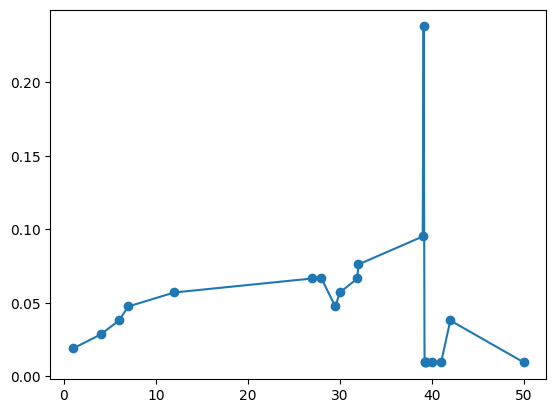

Случайная величина: Вероятностная мера


{1.0: 0.01904761904761905,
 4.0: 0.02857142857142857,
 6.0: 0.0380952380952381,
 7.0: 0.047619047619047616,
 12.0: 0.05714285714285714,
 27.0: 0.06666666666666667,
 28.0: 0.06666666666666667,
 29.5: 0.047619047619047616,
 30.0: 0.05714285714285714,
 31.9: 0.06666666666666667,
 32.0: 0.0761904761904762,
 39.0: 0.09523809523809523,
 39.1: 0.23809523809523808,
 39.2: 0.009523809523809525,
 39.3: 0.009523809523809525,
 39.4: 0.009523809523809525,
 40.0: 0.009523809523809525,
 41.0: 0.009523809523809525,
 42.0: 0.0380952380952381,
 50.0: 0.009523809523809525}

In [4]:
table = dict(zip(variants, freq))
plt.plot(variants, freq, '-o')
plt.show()

print('Случайная величина: Вероятностная мера')
table

<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [5]:
summary = sum(freq)

print(f'Сумма частот -{summary}, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.')

freq_norm = list(map(lambda p: p / summary, freq))

print(f'Снова суммируем и получаем: {sum(freq_norm)}')

distribution = sps.rv_discrete(values = (variants, freq_norm))

Сумма частот -0.9999999999999997, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.
Снова суммируем и получаем: 1.0


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [6]:
size = 100
sample = distribution.rvs(size = size)

In [7]:
sample

array([39.1, 40. , 39. , 31.9, 39.1, 28. , 30. , 28. , 39.1, 39. , 39.1,
       27. ,  7. , 31.9,  7. , 39. , 32. , 39.1, 39. , 29.5,  7. ,  6. ,
       28. , 42. , 41. , 39. ,  1. ,  6. , 28. , 31.9, 39. , 39.3, 30. ,
       12. , 30. , 31.9, 39.1, 28. , 31.9, 39. , 39.4, 32. , 39. , 31.9,
        1. , 31.9, 31.9,  6. , 12. , 41. , 42. , 28. , 39.3, 12. , 31.9,
        4. , 39. ,  4. , 29.5, 39. , 39.1, 40. , 39. , 39.1, 39. ,  4. ,
       39.1,  7. , 39.1, 28. , 39. , 32. , 12. , 40. , 39.1, 27. , 39.1,
        6. , 28. , 32. , 29.5, 39.1, 27. , 28. , 50. , 41. , 39.1, 27. ,
       28. , 41. , 31.9, 39.1, 40. ,  6. , 39.1, 29.5, 30. , 28. , 39.1,
       42. ])

In [8]:
variants

array([ 1. ,  4. ,  6. ,  7. , 12. , 27. , 28. , 29.5, 30. , 31.9, 32. ,
       39. , 39.1, 39.2, 39.3, 39.4, 40. , 41. , 42. , 50. ])

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [9]:
from collections import Counter
from collections import OrderedDict

counter = Counter(sample)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

In [10]:
def find_median(array):
    middle = len(array) / 2.
    if (middle % 1 == 0):
        return (array[int(middle) + 1] + array[int(middle)]) / 2
    else:
        return array[int(middle)]

In [11]:
print('Объем выборки:', len(sample))
print('Минимум, максимум:', (min(sample), max(sample)))

avg = sum(sample) / size

def moment(n, length = size, array = sample):
    return np.sum(list(map(lambda x: (x - avg) ** n, array))) / length

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1))
print('Размах:', max(sample) - min(sample))

print('Ассиметрия:', moment(3) / moment(2) ** (3 / 2))
print('Эксцесс:', moment(4) / (moment(2) ** 2) - 3)

print('II момент:', moment(2))
print('III момент:', moment(3))
print('IV момент:', moment(4))

print('Медиана:', find_median(list(sample)))
print('Мода:', multimode(list(sample)))

Объем выборки: 100
Минимум, максимум: (1.0, 50.0)
Среднее: 30.107
Дисперсия: 147.19257676767677
Размах: 49.0
Ассиметрия: -1.1378815903953958
Эксцесс: 0.11493500615842711
II момент: 145.720651
III момент: -2001.6066040139997
IV момент: 66144.1127060386
Медиана: 35.0
Мода: [39.1]


Получаем значения через функции из пакета Stats

In [12]:
obj = sps.describe(sample)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(sample, moment = 2))
print('III момент:', sps.moment(sample, moment = 3))
print('IV момент:', sps.moment(sample, moment = 4))

mode = sps.mode(sample, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (1.0, 50.0)
Среднее: 30.107000000000003
Дисперсия: 147.19257676767677
Ассиметрия: -1.137881590395397
Эксцесс: 0.114935006158428
II момент: 145.720651
III момент: -2001.6066040140015
IV момент: 66144.11270603862
Мода: 39.1 количество: 17


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [13]:
counter

Counter({39.1: 17,
         39.0: 13,
         28.0: 11,
         31.9: 10,
         6.0: 5,
         40.0: 4,
         30.0: 4,
         27.0: 4,
         7.0: 4,
         32.0: 4,
         29.5: 4,
         41.0: 4,
         12.0: 4,
         42.0: 3,
         4.0: 3,
         1.0: 2,
         39.3: 2,
         39.4: 1,
         50.0: 1})

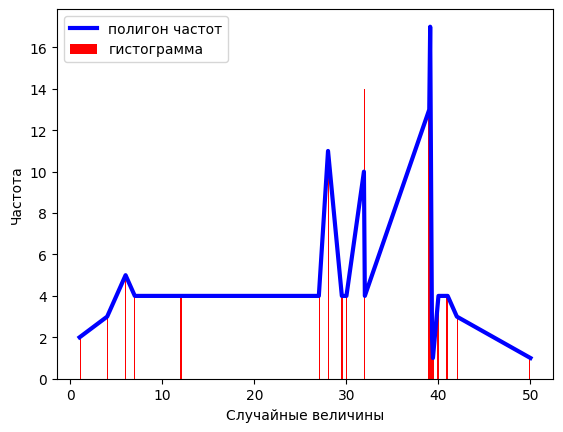

In [14]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(sample, 3 * size, color = 'red', label = 'гистограмма')
plt.legend()

plt.xlabel('Случайные величины')
plt.ylabel('Частота')

plt.show()

**Задача.** Получение и визуализация выборки заданного <i><u>непрерывного</u></i> распределения.

<i>Шаг 1.</i> 

Из списка непрерывных случйных величин выберите с номером $N$. 

In [15]:
reader = PyPDF2.PdfReader('datasets/Непрерывные величны, практикум 1.pdf')

message = 'Вариант '
variant = f'Вариант {N}'

for i in range(len(reader.pages)):
    
    text = reader.pages[i].extract_text()
    
    if variant in text:
        index = text.index(str(N))
        
        end = index
        while not end == len(text) and not text[end] == 'В':
            message += text[end]
            end += 1
        break

print(message)

Вариант 14
X распределен по закону N(2, 5)



In [16]:
parameters = re.findall(r'\w+', message)

μ = int(parameters[-2])
σ_square = int(parameters[-1])

print(f'μ = {μ}, σ_square = {σ_square}')

μ = 2, σ_square = 5


<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [17]:
normal = sps.norm.rvs(size = size, loc = μ, scale = np.sqrt(σ_square))
show_count = 12

print(f'Первые {show_count} значений выборки:\n', normal[:show_count])

Первые 12 значений выборки:
 [1.9923461  2.10358144 1.01799801 0.99960563 3.10171659 2.25491426
 0.68907897 1.82574993 0.5925043  4.87711938 2.37904562 3.04589457]


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [18]:
bin_count = 15

bins = np.linspace(min(normal), max(normal), num = bin_count)
            
counter = Counter(np.digitize(normal, bins))
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

data = dict.fromkeys(bins, 0)

for key, count in oredered.items():
    data[bins[key - 1]] = count

print(f'Массив вариант: \n{data.keys()}', '\n\n' , f'Массив частот: \n{data.values()}')

Массив вариант: 
dict_keys([-2.2442396162631724, -1.5378287529835495, -0.8314178897039268, -0.12500702642430417, 0.5814038368553187, 1.2878147001349416, 1.994225563414564, 2.700636426694187, 3.40704728997381, 4.113458153253433, 4.8198690165330556, 5.526279879812678, 6.2326907430923, 6.939101606371924, 7.645512469651545]) 

 Массив частот: 
dict_values([3, 3, 6, 9, 18, 10, 15, 11, 9, 5, 5, 2, 2, 1, 1])


<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [19]:
print('Объем выборки:', len(normal))
print('Минимум, максимум:', (min(normal), max(normal)))

avg = sum(normal) / size

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1, array = normal))
print('Размах:', max(normal) - min(normal))

print('Ассиметрия:', moment(3, array = normal) / moment(2, array = normal) ** (3 / 2))
print('Эксцесс:', moment(4, array = normal) / (moment(2, array = normal) ** 2) - 3)

print('II момент:', moment(2, array = normal))
print('III момент:', moment(3, array = normal))
print('IV момент:', moment(4, array = normal))

print('Медиана:', find_median(list(normal)))
print('Мода (ограничение на 3 значения):', multimode(list(normal))[:3])

Объем выборки: 100
Минимум, максимум: (-2.2442396162631724, 7.645512469651545)
Среднее: 2.1298428196677017
Дисперсия: 4.206621987952504
Размах: 9.889752085914719
Ассиметрия: 0.3537183481205304
Эксцесс: -0.15914961042483045
II момент: 4.1645557680729794
III момент: 3.006149752942509
IV момент: 49.270359029547556
Медиана: 2.2402148666676966
Мода (ограничение на 3 значения): [1.9923460954084011, 2.1035814434602536, 1.0179980073211405]


Получаем значения через функции из пакета Stats

In [20]:
obj = sps.describe(normal)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(normal, moment = 2))
print('III момент:', sps.moment(normal, moment = 3))
print('IV момент:', sps.moment(normal, moment = 4))

mode = sps.mode(normal, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (-2.2442396162631724, 7.645512469651545)
Среднее: 2.129842819667702
Дисперсия: 4.206621987952505
Ассиметрия: 0.35371834812052966
Эксцесс: -0.15914961042483045
II момент: 4.1645557680729794
III момент: 3.0061497529425028
IV момент: 49.270359029547556
Мода: -2.2442396162631724 количество: 1


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

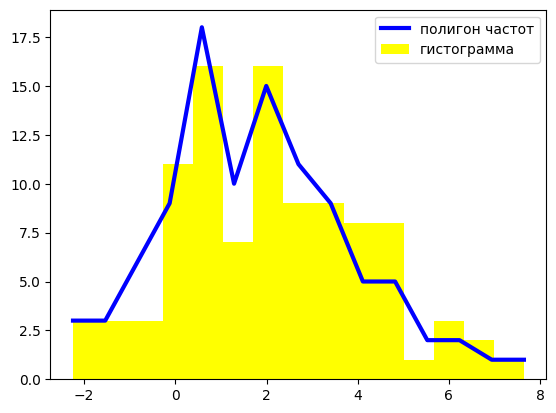

In [21]:
plt.figure()
plt.plot(data.keys(), data.values(), color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(normal, bin_count, color = 'yellow', label = 'гистограмма')
plt.legend()
plt.show()